# **Assessment of Validation Metrics**

## **Import Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as pyo
import pickle
import warnings
warnings.filterwarnings("ignore")

## **Load all the Models**

In [2]:
# Import the models
# Import the models
rf_model_path = r"D:\Coding\Git Repository\Research Repo\Flood\Flood-Susceptibility-Zonation-of-Maldah\Model\rf_model.pkl"
xgb_model_path = r"D:\Coding\Git Repository\Research Repo\Flood\Flood-Susceptibility-Zonation-of-Maldah\Model\xgb_model.pkl"
log_reg_model_path = r"D:\Coding\Git Repository\Research Repo\Flood\Flood-Susceptibility-Zonation-of-Maldah\Model\log_reg_model.pkl"
svm_model_path = r"D:\Coding\Git Repository\Research Repo\Flood\Flood-Susceptibility-Zonation-of-Maldah\Model\svm_model.pkl"

rf_model = pickle.load(open(rf_model_path, "rb"))
xgb_model = pickle.load(open(xgb_model_path, "rb"))
log_reg_model = pickle.load(open(log_reg_model_path, "rb"))
svm_model = pickle.load(open(svm_model_path, "rb"))

## **Import Test Data**

In [3]:
# Import the testing data
testing_df = pd.read_csv("D:\Research Works\Flood\Flood_Risk_Zonation_of_Maldah\Datasets\CSVs\Testing_Data.csv")
testing_df.head()

,Relief_Amplitude,Dist_to_River,TWI,Rainfall,Clay_Content,STI,TRI,TPI,SPI,NDVI,...,Lithology_Fe_Ox_S_Si_Cl,Lithology_S_Si_Cl,Lithology_S_Si_Cl_wi_Cal_Co,Lithology_S_Si_Gr,LULC_Agricultural_Field,LULC_Bare_Ground,LULC_Built_UP_Area,LULC_Natural_Vegetation,LULC_Waterbodies,Flood
0,0.163265,0.017297,0.520829,0.088173,0.666667,0.002180,0.270604,0.382802,0.000144,0.713929,...,0,1,0,0,1,0,0,0,0,1
1,0.040816,0.008649,0.570254,0.871880,0.761905,0.000146,0.138092,0.494965,0.000012,0.395510,...,0,1,0,0,1,0,0,0,0,0
2,0.102041,0.079737,0.170232,0.475129,0.761905,0.000000,0.237181,0.495553,0.000000,0.373748,...,0,0,0,1,0,0,1,0,0,0
3,0.020408,0.017297,0.567649,0.370257,0.690476,0.000337,0.094671,0.536425,0.000029,0.735108,...,0,1,0,0,1,0,0,0,0,1
4,0.000000,0.453789,0.506040,0.605048,0.785714,0.000000,0.000000,0.384819,0.000001,0.459768,...,0,0,0,1,0,0,0,1,0,0


In [4]:
# Select the best feature
X_test = testing_df[rf_model.feature_names_in_]
y_test = testing_df["Flood"]

In [5]:
X_test

,Dist_to_River,TWI,Rainfall,Clay_Content,TRI,NDVI,MFI,Elevation,MNDWI,Drainage_Density,Geomorphology_Active_Flood_Plain,Geomorphology_Older_Alluvial_Plain,Geomorphology_Older_Flood_Plain,Lithology_Cl_wi_S_Si_Ir_N,Lithology_Fe_Ox_S_Si_Cl,Lithology_S_Si_Cl,Lithology_S_Si_Cl_wi_Cal_Co,LULC_Agricultural_Field,LULC_Built_UP_Area,LULC_Natural_Vegetation
0,0.017297,0.520829,0.088173,0.666667,0.270604,0.713929,0.088429,0.253333,0.440593,0.190851,1,0,0,0,0,1,0,1,0,0
1,0.008649,0.570254,0.871880,0.761905,0.138092,0.395510,0.854243,0.253333,0.250467,0.622337,0,1,0,0,0,1,0,1,0,0
2,0.079737,0.170232,0.475129,0.761905,0.237181,0.373748,0.427817,0.320000,0.398804,0.711552,0,0,1,0,0,0,0,0,1,0
3,0.017297,0.567649,0.370257,0.690476,0.094671,0.735108,0.395295,0.240000,0.452172,0.368527,1,0,0,0,0,1,0,1,0,0
4,0.453789,0.506040,0.605048,0.785714,0.000000,0.459768,0.543641,0.213333,0.572473,0.388870,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,0.085180,0.490869,0.805669,0.000000,0.000000,0.416317,0.724173,0.186667,0.322653,0.906714,1,0,0,0,0,1,0,0,0,0
674,0.250812,0.611297,0.665655,0.785714,0.241167,0.415231,0.620405,0.320000,0.391361,0.336242,0,0,1,0,0,1,0,0,1,0
675,0.449732,0.098939,0.858297,0.761905,0.275839,0.720634,0.886617,0.306667,0.452278,0.356751,0,0,0,0,0,1,0,1,0,0
676,0.519858,0.090232,0.453336,0.714286,0.317311,0.560459,0.432133,0.373333,0.326396,0.303396,0,1,0,1,0,0,0,1,0,0


## **Plot the ROC and AUC**

In [6]:
from sklearn.metrics import roc_curve, roc_auc_score

In [7]:
# Store the classifiers in a list
classifiers = [
    ("Logistic Regression", log_reg_model),
    ("Support Vector Machine", svm_model),
    ("Random Forest", rf_model),
    ("XGBoost", xgb_model)
]

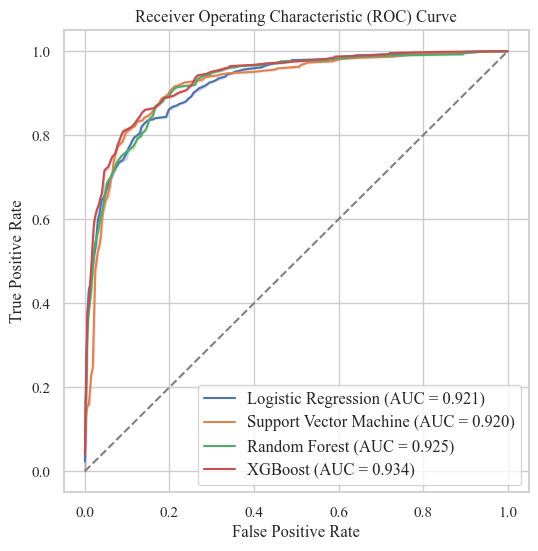

In [8]:
# Create a plot for ROC curves
plt.figure(figsize=(6, 6), dpi=100)

sns.set(style="whitegrid")
# sns.set(font='Times New Roman')

# Loop through each classifier
for name, classifier in classifiers:
    # Predict the test data
    classifier.predict(X_test)
    
    # Predict probabilities
    y_pred_prob = classifier.predict_proba(X_test)[:, 1]
    
    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    # Calculate the AUC score
    auc = roc_auc_score(y_test, y_pred_prob)
    
    # Plot the ROC curve
    sns.lineplot(x=fpr, y=tpr, label=f"{name} (AUC = {auc:.3f})")

# Add labels and legend
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate', fontname="Times New Roman")
plt.ylabel('True Positive Rate', fontname="Times New Roman")
plt.xticks(fontname="Times New Roman")
plt.yticks(fontname="Times New Roman")
plt.title('Receiver Operating Characteristic (ROC) Curve', fontname="Times New Roman")
legend = plt.legend(loc='best')

for text in legend.get_texts():
    text.set_fontname('Times New Roman')
    text.set_fontsize(12)

# Show the plot
plt.show()

## **Plot the Validation Metrics**

In [10]:
from sklearn.metrics import classification_report

In [11]:
for name, classifier in classifiers:
    print(name)
    print(classification_report(y_test, classifier.predict(X_test)))

Logistic Regression
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       323
           1       0.84      0.84      0.84       355

    accuracy                           0.83       678
   macro avg       0.83      0.83      0.83       678
weighted avg       0.83      0.83      0.83       678

Support Vector Machine
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       323
           1       0.84      0.89      0.87       355

    accuracy                           0.86       678
   macro avg       0.86      0.85      0.85       678
weighted avg       0.86      0.86      0.86       678

Random Forest
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       323
           1       0.85      0.86      0.86       355

    accuracy                           0.85       678
   macro avg       0.85      0.85      0.85       678
weighted avg     

## **Plot SHAP Values**

In [62]:
import shap

In [90]:
order = X_test.columns
col2num = {col: i for i, col in enumerate(X_test.columns)}

order = list(map(col2num.get, order))

In [91]:
order

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

### **Shap Values of Logistic Regression**

In [63]:
# Fits the explainer
log_reg_explainer = shap.Explainer(log_reg_model.predict, X_test)

# Calculates the SHAP values - It takes some time
log_shap_values = log_reg_explainer(X_test)

Permutation explainer: 679it [00:12, 11.90it/s]                                                                        


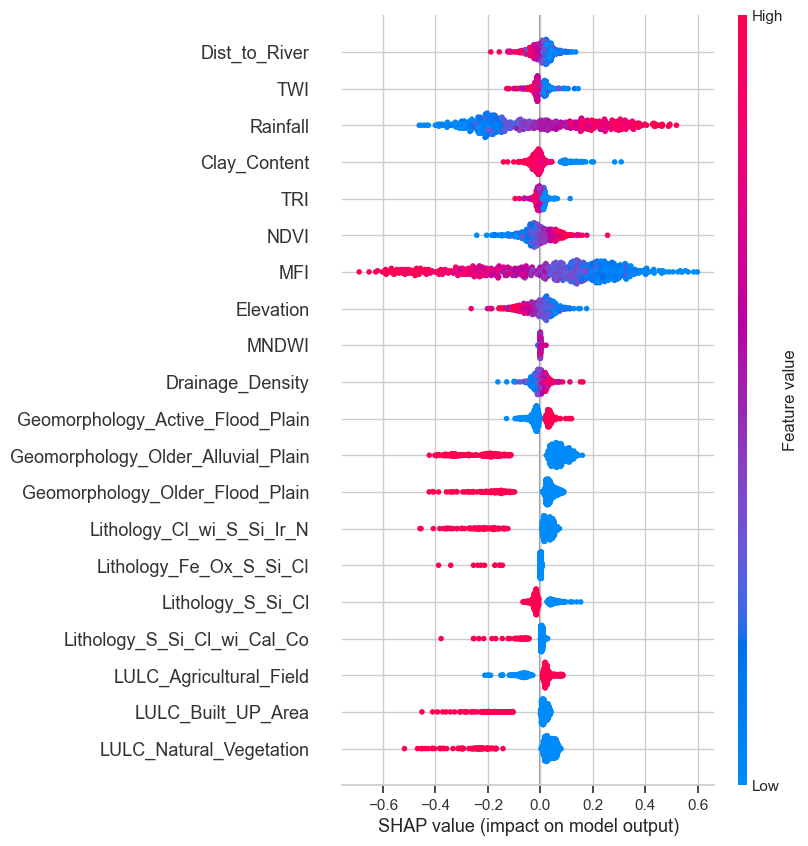

In [102]:
plt.figure()
shap.plots.beeswarm(log_shap_values, max_display=None, order=order, plot_size=(6, 10))

### **SHAP Values of Support Vector Machine** 

In [103]:
# Fits the explainer
svm_explainer = shap.Explainer(svm_model.predict, X_test)

# Calculates the SHAP values - It takes some time
svm_shap_values = svm_explainer(X_test)

Permutation explainer: 679it [17:31,  1.57s/it]                                                                        


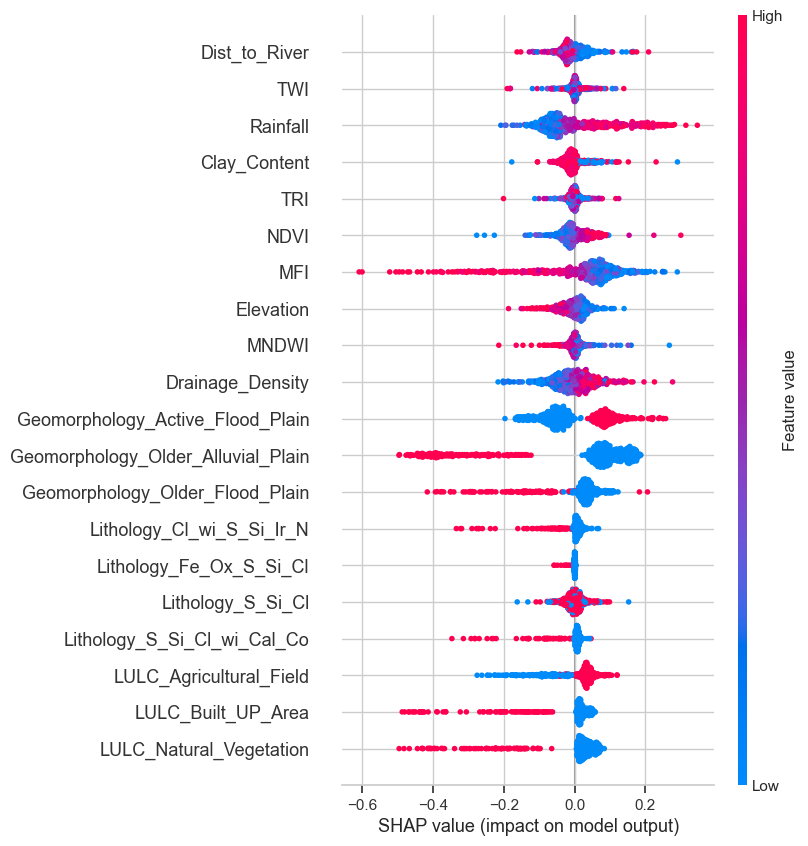

In [106]:
plt.figure()
shap.plots.beeswarm(svm_shap_values, max_display=None, order=order, plot_size=(6, 10))

### **SHAP Values of Random Forest**

In [105]:
# Fits the explainer
rf_explainer = shap.Explainer(rf_model.predict, X_test)

# Calculates the SHAP values - It takes some time
rf_shap_values = rf_explainer(X_test)

Permutation explainer: 679it [01:53,  5.42it/s]                                                                        


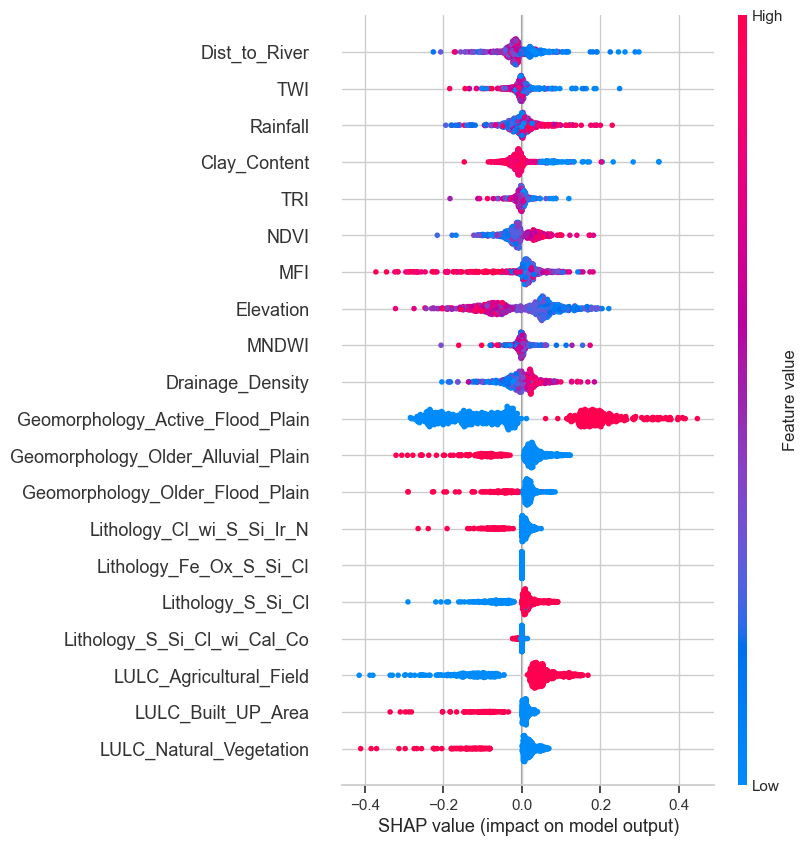

In [110]:
plt.figure()
shap.plots.beeswarm(rf_shap_values, max_display=None, order=order, plot_size=(6, 10))

### **SHAP Values of XGBoost**

In [108]:
# Fits the explainer
xgb_explainer = shap.Explainer(xgb_model.predict, X_test)

# Calculates the SHAP values - It takes some time
xgb_shap_values = xgb_explainer(X_test)

Permutation explainer: 679it [00:35, 13.71it/s]                                                                        


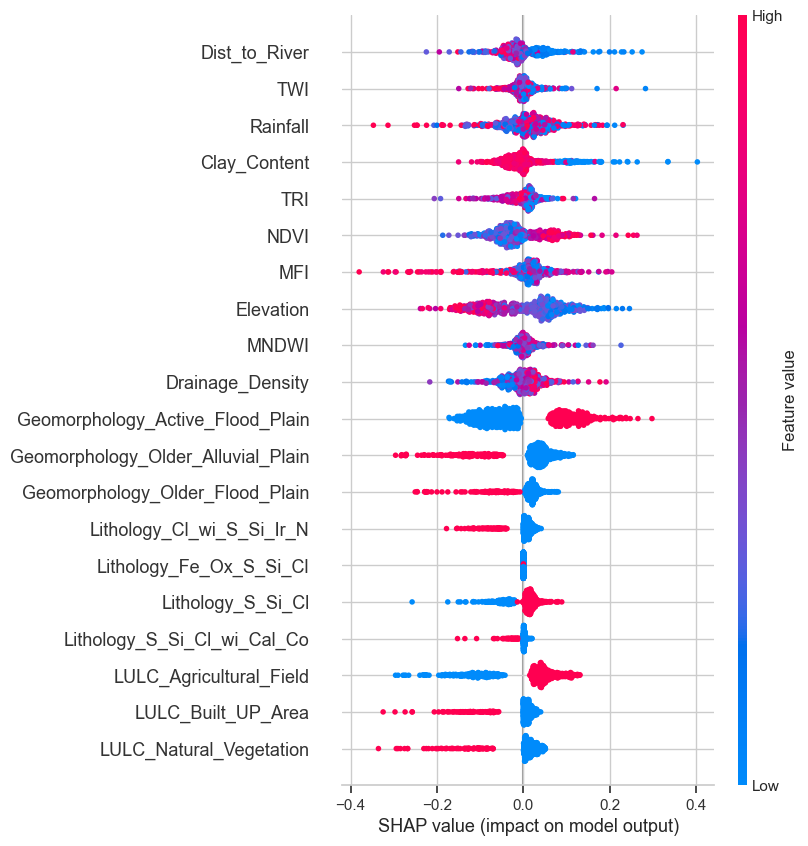

In [111]:
plt.figure()
shap.plots.beeswarm(xgb_shap_values, max_display=None, order=order, plot_size=(6, 10))